In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import seaborn as sns
from time import time
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
control_data_path=os.path.join('data', 'control')
parkinson_data_path=os.path.join('data', 'parkinson')

In [3]:
control_file_list=[os.path.join(control_data_path, x) for x in os.listdir(control_data_path)]
parkinson_file_list=[os.path.join(parkinson_data_path, x) for x in os.listdir(parkinson_data_path)]

In [4]:
def plot(f, plot_func, t_id=0, x=None, y=None):
    global header_row
    df=pd.read_csv(f, sep=';', header=None, names=header_row)
    df=df[df["Test_ID"]==t_id]
    initial_timestamp=df['Timestamp'][0]
    df['Timestamp']=df['Timestamp']- initial_timestamp
    plot_func(data=df, x=x, y=y, fit_reg=False, scatter_kws={"s": 0.5})
    print(metrics(test_y.tolist(), preds.tolist()))

In [5]:
f = control_file_list[0]
f2 = parkinson_file_list[0]
header_row=["X", "Y", "Z", "Pressure" , "GripAngle" , "Timestamp" , "Test_ID"]

In [6]:
dfh=pd.read_csv(f, sep=';', header=None, names=header_row)

In [7]:
dfh=dfh[dfh["Test_ID"]==0]

In [8]:
dfh

,X,Y,Z,Pressure,GripAngle,Timestamp,Test_ID
0,200,204,0,73,910,1732647300,0
1,200,204,0,218,900,1732647307,0
2,200,204,0,253,900,1732647314,0
3,200,204,0,304,900,1732647321,0
4,200,204,0,351,900,1732647328,0
...,...,...,...,...,...,...,...
2573,399,203,0,770,650,1732665409,0
2574,399,203,0,674,690,1732665416,0
2575,399,202,12,510,680,1732665423,0
2576,400,201,24,260,660,1732665430,0


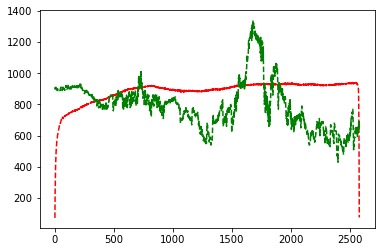

In [9]:
plt.plot(dfh['Pressure'], 'r--',dfh['GripAngle'],'g--')

In [10]:
dfp=pd.read_csv(f2, sep=';', header=None, names=header_row)

In [11]:
dfp=dfp[dfp["Test_ID"]==0]

In [15]:
dfp

,X,Y,Z,Pressure,GripAngle,Timestamp,Test_ID
0,201,200,0,20,880,68140147,0
1,201,200,0,86,900,68140154,0
2,201,200,0,123,900,68140161,0
3,201,200,0,146,900,68140168,0
4,201,200,0,158,900,68140175,0
...,...,...,...,...,...,...,...
4611,400,205,0,556,1480,68173107,0
4612,400,205,0,525,1500,68173114,0
4613,400,206,0,484,1510,68173121,0
4614,400,206,0,386,1510,68173128,0


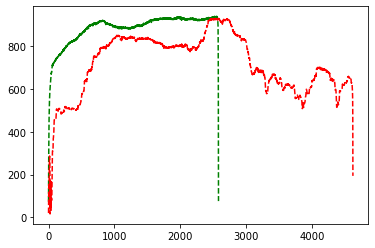

In [16]:
plt.plot(dfh['Pressure'], 'g--',dfp['Pressure'],'r--')

In [17]:
from sklearn.cluster import KMeans

In [18]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(dfh,dfp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
Kmean.cluster_centers_

array([[1.83196899e+02, 2.07768992e+02, 5.86046512e-01, 8.46986047e+02,
        8.19899225e+02, 1.73265184e+09, 0.00000000e+00],
       [2.16301242e+02, 2.01979814e+02, 8.57142857e-01, 9.21473602e+02,
        7.68695652e+02, 1.73266091e+09, 0.00000000e+00]])

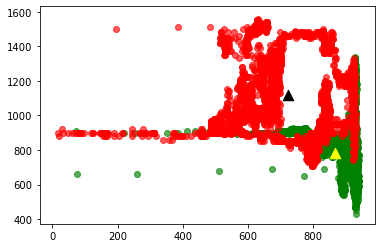

In [22]:
plt.scatter(dfh['Pressure'], dfh['GripAngle'], color='green', alpha=0.65)
plt.scatter(dfp['Pressure'], dfp['GripAngle'], color='red', alpha=0.65)
plt.scatter(7.21473602e+02,11.18695652e+02, s=111, color='black', marker='^')
plt.scatter(8.66986047e+02,7.79899225e+02, s=111, color='yellow', marker='^')
plt.show()